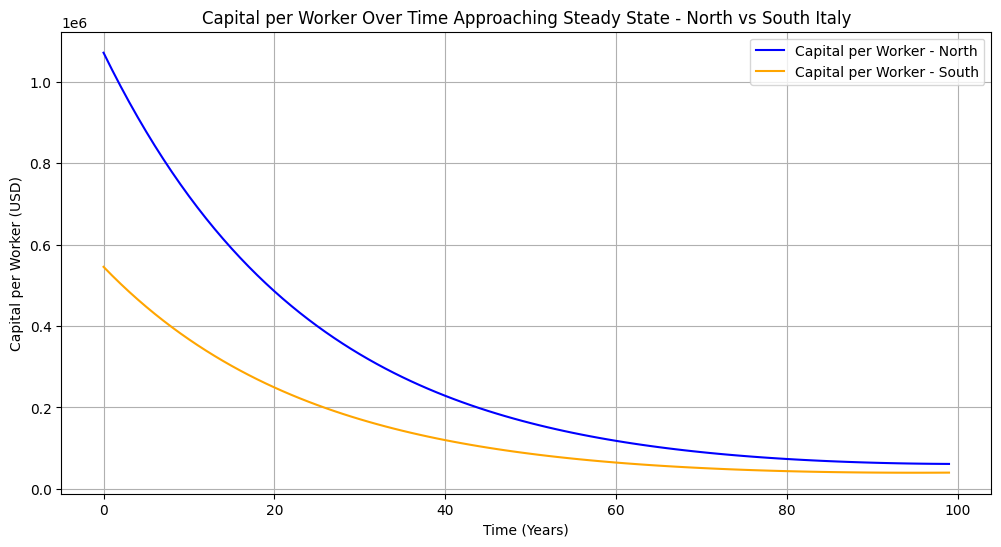

Steady-State Capital per Worker (North): 3457.36 USD
Steady-State Capital per Worker (South): 2664.58 USD


In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Given parameters
alpha = 0.3
delta = 0.04
g = 0.02  # Annual growth rate of technology
A_initial = 100
T = 100  # Time periods

# Northern Italy data
s_north = 0.12
L_north = 14e6  # 14 million
K_north_initial = 15e12  # 9 trillion USD

# Southern Italy data
s_south = 0.10
L_south = 11e6  # 9 million
K_south_initial = 6e12  # 3 trillion USD

# Calculate initial capital per worker
k_north_initial = K_north_initial / L_north
k_south_initial = K_south_initial / L_south

# Differential equation calculation for ▲k
def differential_equation(k, s, A, alpha, delta, n):
    y = A * k**alpha  # Output per worker
    return s * y - (delta) * k

# Forecasting over time
k_north_forecast = np.zeros(T)
k_south_forecast = np.zeros(T)
A_forecast = np.zeros(T)
k_north_forecast[0] = k_north_initial
k_south_forecast[0] = k_south_initial
A_forecast[0] = A_initial

for t in range(1, T):
    # Technological progress
    A_forecast[t] = A_forecast[t-1] * (1 + g)

    # Capital accumulation equations
    k_north_forecast[t] = k_north_forecast[t-1] + differential_equation(
        k_north_forecast[t-1], s_north, A_forecast[t], alpha, delta, n
    )
    k_south_forecast[t] = k_south_forecast[t-1] + differential_equation(
        k_south_forecast[t-1], s_south, A_forecast[t], alpha, delta, n
    )

# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(k_north_forecast, label='Capital per Worker - North', color='blue')
plt.plot(k_south_forecast, label='Capital per Worker - South', color='orange')
plt.xlabel('Time (Years)')
plt.ylabel('Capital per Worker (USD)')
plt.title('Capital per Worker Over Time Approaching Steady State - North vs South Italy')
plt.legend()
plt.grid(True)
plt.show()

# Calculate and print steady-state values for comparison
k_north_steady = (s_north * A_initial / delta)**(1 / (1 - alpha))
k_south_steady = (s_south * A_initial / delta)**(1 / (1 - alpha))
print(f"Steady-State Capital per Worker (North): {k_north_steady:.2f} USD")
print(f"Steady-State Capital per Worker (South): {k_south_steady:.2f} USD")


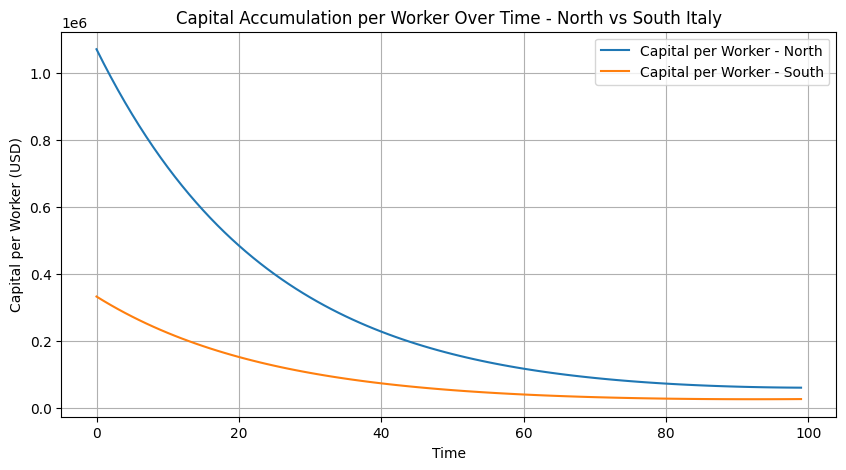

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Given parameters
alpha = 0.3
delta = 0.04
g = 0.02  # Annual growth rate of technology
A_initial = 100
T = 100  # Time periods

# Northern Italy data
s_north = 0.12
Y_north = 1.2e12  # 1.2 trillion USD
L_north = 14e6  # 14 million
K_north_initial = 15e12  # 9 trillion USD

# Southern Italy data
s_south = 0.08
Y_south = 350e9  # 350 billion USD
L_south = 9e6  # 9 million
K_south_initial = 3e12  # 3 trillion USD

# Calculate initial capital per worker
k_north_initial = K_north_initial / L_north
k_south_initial = K_south_initial / L_south

# Differential equation calculation for k
def differential_equation(k, s, y, delta):
    return s * y - delta * k

# Forecasting over time
k_north_forecast = np.zeros(T)
k_south_forecast = np.zeros(T)
A_forecast = np.zeros(T)
k_north_forecast[0] = k_north_initial
k_south_forecast[0] = k_south_initial
A_forecast[0] = A_initial

for t in range(1, T):
    A_forecast[t] = A_forecast[t-1] * (1 + g)
    y_north = A_forecast[t] * k_north_forecast[t-1]**alpha
    y_south = A_forecast[t] * k_south_forecast[t-1]**alpha
    k_north_forecast[t] = k_north_forecast[t-1] + differential_equation(k_north_forecast[t-1], s_north, y_north, delta)
    k_south_forecast[t] = k_south_forecast[t-1] + differential_equation(k_south_forecast[t-1], s_south, y_south, delta)

# Plotting the results
plt.figure(figsize=(10, 5))
plt.plot(k_north_forecast, label='Capital per Worker - North')
plt.plot(k_south_forecast, label='Capital per Worker - South')
plt.xlabel('Time')
plt.ylabel('Capital per Worker (USD)')
plt.legend()
plt.title('Capital Accumulation per Worker Over Time - North vs South Italy')
plt.grid(True)
plt.show()

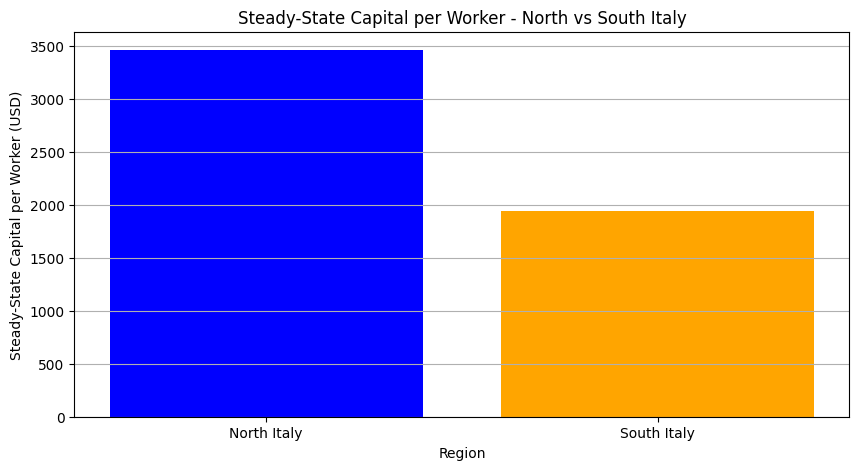

Steady-State Capital per Worker (North): 3457.36 USD
Steady-State Capital per Worker (South): 1937.25 USD
Steady-State Output per Worker (North): 1152.45 USD
Steady-State Output per Worker (South): 968.63 USD


In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Given parameters
alpha = 0.3
delta = 0.04
s_north = 0.12
s_south = 0.08
A_initial = 100

# Northern Italy data
L_north = 14e6  # 14 million

# Southern Italy data
L_south = 9e6  # 9 million

# Steady-state calculation for capital per worker
def steady_state_capital(s, A, alpha, delta):
    return (s * A / delta)**(1 / (1 - alpha))

# Steady-state values
k_north_steady = steady_state_capital(s_north, A_initial, alpha, delta)
k_south_steady = steady_state_capital(s_south, A_initial, alpha, delta)

# Calculate output per worker in the steady state
def output_per_worker(A, k, alpha):
    return A * k**alpha

y_north_steady = output_per_worker(A_initial, k_north_steady, alpha)
y_south_steady = output_per_worker(A_initial, k_south_steady, alpha)

# Plotting the steady-state results
plt.figure(figsize=(10, 5))
plt.bar(['North Italy', 'South Italy'], [k_north_steady, k_south_steady], color=['blue', 'orange'])
plt.xlabel('Region')
plt.ylabel('Steady-State Capital per Worker (USD)')
plt.title('Steady-State Capital per Worker - North vs South Italy')
plt.grid(axis='y')
plt.show()

print(f"Steady-State Capital per Worker (North): {k_north_steady:.2f} USD")
print(f"Steady-State Capital per Worker (South): {k_south_steady:.2f} USD")
print(f"Steady-State Output per Worker (North): {y_north_steady:.2f} USD")
print(f"Steady-State Output per Worker (South): {y_south_steady:.2f} USD")

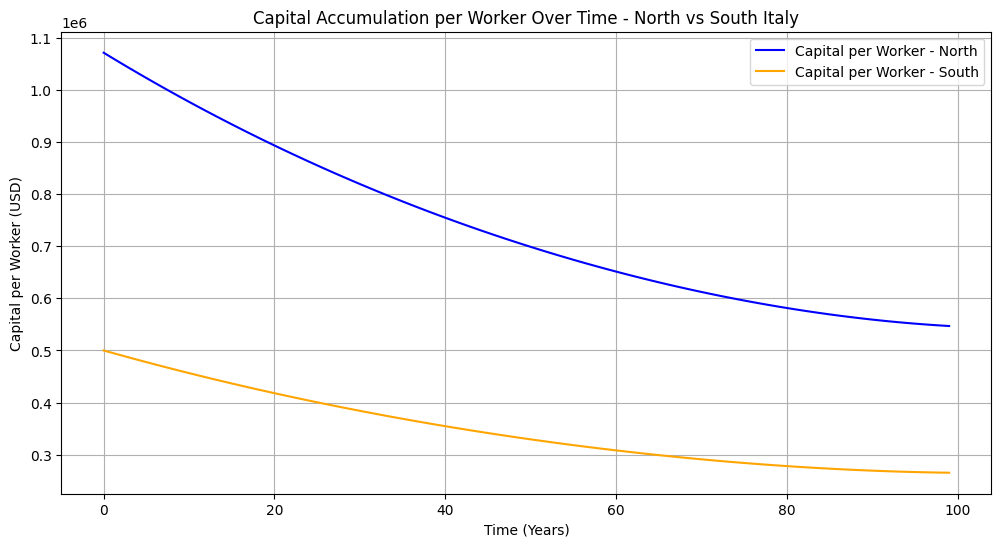

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Given parameters
alpha = 0.3
delta = 0.04
n = -0.03
g = 0.02  # Annual growth rate of technology
A_initial = 100
T = 100  # Time periods

# Northern Italy data
s_north = 0.12
L_north = 14e6  # 14 million
K_north_initial = 15e12  # 15 trillion USD

# Southern Italy data
s_south = 0.08
L_south = 12e6  # 9 million
K_south_initial = 6e12  # 3 trillion USD

# Calculate initial capital per worker
k_north_initial = K_north_initial / L_north
k_south_initial = K_south_initial / L_south

# Differential equation calculation for ▲k
def differential_equation(k, s, A, alpha, delta, n):
    y = A * k**alpha  # Output per worker
    return s * y - (delta + n) * k

# Forecasting over time
k_north_forecast = np.zeros(T)
k_south_forecast = np.zeros(T)
A_forecast = np.zeros(T)
k_north_forecast[0] = k_north_initial
k_south_forecast[0] = k_south_initial
A_forecast[0] = A_initial

for t in range(1, T):
    # Technological progress
    A_forecast[t] = A_forecast[t-1] * (1 + g)

    # Capital accumulation equations
    k_north_forecast[t] = k_north_forecast[t-1] + differential_equation(
        k_north_forecast[t-1], s_north, A_forecast[t], alpha, delta, n
    )
    k_south_forecast[t] = k_south_forecast[t-1] + differential_equation(
        k_south_forecast[t-1], s_south, A_forecast[t], alpha, delta, n
    )

# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(k_north_forecast, label='Capital per Worker - North', color='blue')
plt.plot(k_south_forecast, label='Capital per Worker - South', color='orange')
plt.xlabel('Time (Years)')
plt.ylabel('Capital per Worker (USD)')
plt.title('Capital Accumulation per Worker Over Time - North vs South Italy')
plt.legend()
plt.grid(True)
plt.show()


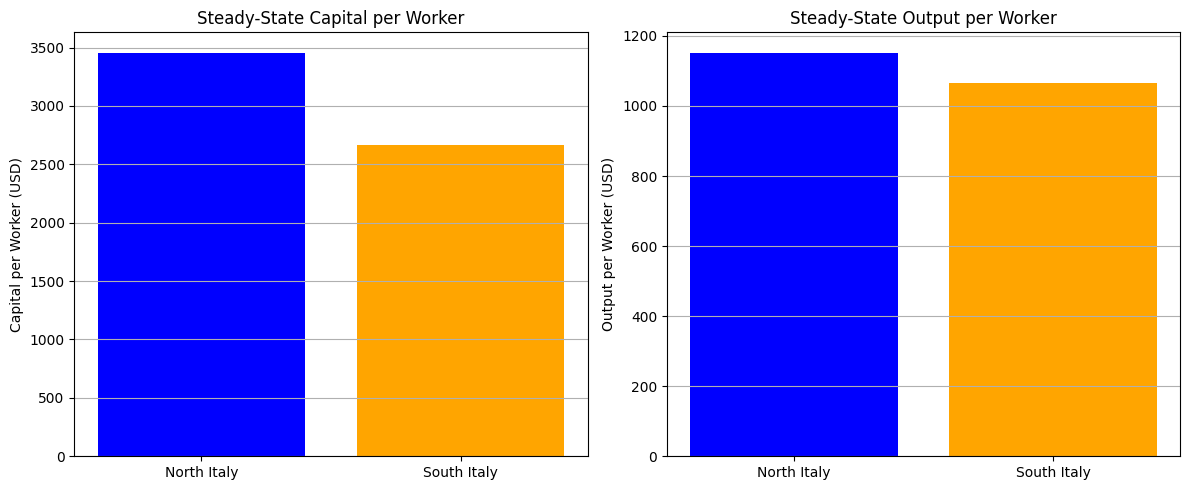

Steady-State Capital per Worker (North): 3457.36 USD
Steady-State Capital per Worker (South): 2664.58 USD
Steady-State Output per Worker (North): 1152.45 USD
Steady-State Output per Worker (South): 1065.83 USD


In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Given parameters
alpha = 0.3
delta = 0.04
A_initial = 100

# Northern Italy data
s_north = 0.12
L_north = 14e6  # 14 million

# Southern Italy data
s_south = 0.10
L_south = 11e6  # 9 million

# Steady-state calculation for capital per worker
def steady_state_capital(s, A, alpha, delta):
    return (s * A / delta)**(1 / (1 - alpha))

# Calculate steady-state values
k_north_steady = steady_state_capital(s_north, A_initial, alpha, delta)
k_south_steady = steady_state_capital(s_south, A_initial, alpha, delta)

# Calculate output per worker at steady state
def output_per_worker(A, k, alpha):
    return A * k**alpha

y_north_steady = output_per_worker(A_initial, k_north_steady, alpha)
y_south_steady = output_per_worker(A_initial, k_south_steady, alpha)

# Visualize steady-state capital per worker and output per worker
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Steady-state capital per worker
ax[0].bar(['North Italy', 'South Italy'], [k_north_steady, k_south_steady], color=['blue', 'orange'])
ax[0].set_title('Steady-State Capital per Worker')
ax[0].set_ylabel('Capital per Worker (USD)')
ax[0].grid(axis='y')

# Steady-state output per worker
ax[1].bar(['North Italy', 'South Italy'], [y_north_steady, y_south_steady], color=['blue', 'orange'])
ax[1].set_title('Steady-State Output per Worker')
ax[1].set_ylabel('Output per Worker (USD)')
ax[1].grid(axis='y')

plt.tight_layout()
plt.show()

# Print results
print(f"Steady-State Capital per Worker (North): {k_north_steady:.2f} USD")
print(f"Steady-State Capital per Worker (South): {k_south_steady:.2f} USD")
print(f"Steady-State Output per Worker (North): {y_north_steady:.2f} USD")
print(f"Steady-State Output per Worker (South): {y_south_steady:.2f} USD")
